## Red Wines Review

In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
red_wines.corr().replace().round(3).style.background_gradient('RdBu_r')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256000,0.672000,0.115000,0.094000,-0.154000,-0.113000,0.668000,-0.683000,0.183000,-0.062000,0.124000
volatile acidity,-0.256000,1.000000,-0.552000,0.002000,0.061000,-0.011000,0.076000,0.022000,0.235000,-0.261000,-0.202000,-0.391000
citric acid,0.672000,-0.552000,1.000000,0.144000,0.204000,-0.061000,0.036000,0.365000,-0.542000,0.313000,0.110000,0.226000
residual sugar,0.115000,0.002000,0.144000,1.000000,0.056000,0.187000,0.203000,0.355000,-0.086000,0.006000,0.042000,0.014000
chlorides,0.094000,0.061000,0.204000,0.056000,1.000000,0.006000,0.047000,0.201000,-0.265000,0.371000,-0.221000,-0.129000
free sulfur dioxide,-0.154000,-0.011000,-0.061000,0.187000,0.006000,1.000000,0.668000,-0.022000,0.070000,0.052000,-0.069000,-0.051000
total sulfur dioxide,-0.113000,0.076000,0.036000,0.203000,0.047000,0.668000,1.000000,0.071000,-0.066000,0.043000,-0.206000,-0.185000
density,0.668000,0.022000,0.365000,0.355000,0.201000,-0.022000,0.071000,1.000000,-0.342000,0.149000,-0.496000,-0.175000
pH,-0.683000,0.235000,-0.542000,-0.086000,-0.265000,0.070000,-0.066000,-0.342000,1.000000,-0.197000,0.206000,-0.058000
sulphates,0.183000,-0.261000,0.313000,0.006000,0.371000,0.052000,0.043000,0.149000,-0.197000,1.000000,0.094000,0.251000


In [4]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


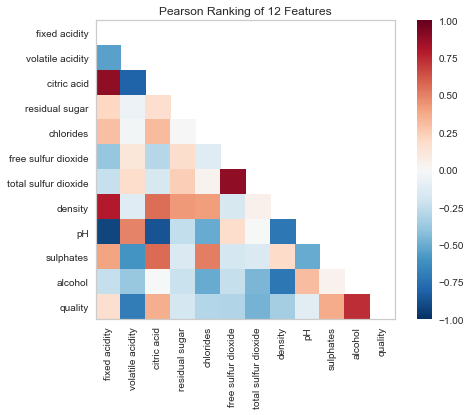

In [5]:
from yellowbrick.features import rank2d

visualizer = rank2d(red_wines.corr())

<AxesSubplot:ylabel='Frequency'>

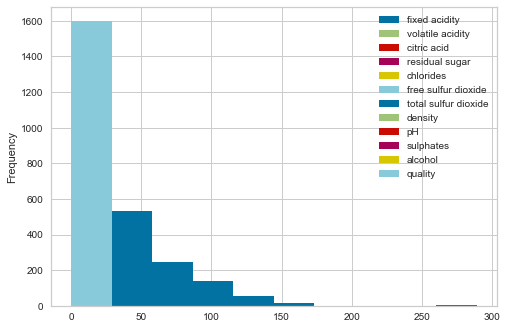

In [6]:
red_wines.plot.hist()

In [7]:
# Assign X & y

X = red_wines.drop(["quality"], axis=1)
y= red_wines.quality

In [8]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6


In [10]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Train the Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 6 5 6
 6 5 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 7 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 6 6 5 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 6 6 7 5 6 6 6 7 6 5 5 5 5 6 5 5 5 5 7 6 5 6 6 6 6 5 6 6 7 6 5 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 5 6 5 5 4 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 6 5 5 5 6 5 5 6 5 6 6 6 5 5 5 6 6 5 6 6 7 5
 5 5 6 6 7 5 5 6 7 6 5 6 5 6 5 6 6 5 7 5 5 6 6 5 5 5 6 6 5 6 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 7 5 6 6 6 5 5 6 6 6 5 5 6 6 7 6 5 6]
[3 4 5 6 7 8]


Noticed the classes above only go from 3-8 so our model will onl classify from 3-8. Need to find a data set or additional data that will classifiy 1 - 10

In [13]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6138448707256047
Testing Data Score: 0.5875


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.63      0.74      0.68       164
           6       0.56      0.59      0.57       169
           7       0.43      0.27      0.33        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.44      0.28      0.29       400
weighted avg       0.58      0.59      0.57       400



C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper Parameter Tuning
Use GridSearchCV to tune the model's parameters

In [15]:
lr = LogisticRegression()

print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [16]:
param_grid = {'C': [1, 10, 100, .1, .01],
              'max_iter': [400, 600, 1500, 2000],
             'penalty': ['elasticnet', 'l1', 'l2','none'],
             }
grid = GridSearchCV(classifier, param_grid, verbose=3,)

In [17]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... C=1, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] ....... C=1, max_iter=400, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2 ...................................
[CV] ....... C=1, max_iter=400, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=600, penalty=elasticnet ...........................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ....... C=1, max_iter=600, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2 ...................................
[CV] ....... C=1, max_iter=600, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2 ...................................
[CV] ....... C=1, max_iter=600, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=1, max_iter=1500, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=2000, penalty=elasticnet ..........................
[CV]  C=1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=2000, penalty=elasticnet ..........................
[CV]  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.546, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=10, max_iter=400, penalty=l2, score=0.579, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1 ..................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=10, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ....... C=100, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1 .................................
[CV] ....... C=100, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.537, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=100, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=100, max_iter=1500, penalty=l2, score=0.537, total=   0.1s
[CV] C=100, max_iter=1500, penalty=l2 ................................
[CV] .... C=100, max_iter=1500, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=1500, penalty=l2 ................................
[CV] .... C=100, max_iter=1500, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=1500, penalty=l2 ................................
[CV] .... C=100, max_iter=1500, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=1500, penalty=l2 ................................
[CV] .... C=100, max_iter=1500, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=100, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=l1 ................................
[CV] ...... C=100, max_iter=2000, penalty=l1, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ... C=0.1, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ... C=0.1, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=0.01, max_iter=600, penalty=l2, score=0.533, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2 ................................
[CV] .... C=0.01, max_iter=600, penalty=l2, score=0.608, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2 ................................
[CV] .... C=0.01, max_iter=600, penalty=l2, score=0.588, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2 ................................
[CV] .... C=0.01, max_iter=600, penalty=l2, score=0.640, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet ..................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=0.01, max_iter=1500, penalty=l2, score=0.533, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l2 ...............................
[CV] ... C=0.01, max_iter=1500, penalty=l2, score=0.608, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l2 ...............................
[CV] ... C=0.01, max_iter=1500, penalty=l2, score=0.588, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l2 ...............................
[CV] ... C=0.01, max_iter=1500, penalty=l2, score=0.640, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] . C=0.01, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=l1 .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   13.0s finished


[CV] . C=0.01, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.657, total=   0.1s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01],
                         'max_iter': [400, 600, 1500, 2000],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'max_iter': 400, 'penalty': 'l2'}
0.596384239888424


In [19]:
# Training Score
grid.score(X_train_scaled, y_train)

0.6171809841534612

In [20]:
# Testing Score
grid.score(X_test_scaled, y_test)

0.5825

Based on first go around, I will adjust parameters from above and add others.  Based on research I will not adjust the tolerance (tol) https://stackoverflow.com/questions/50599895/choosing-a-proper-tolerance-value-in-logistic-regression-scikit-learn

### further tuning

In [21]:
param_grid2 = {'C': [.01, 1, 10],
               'max_iter': [10,50,100,200,250,400],
               'penalty': ['l2'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'class_weight': ['dict', 'balanced']
             }
grid2 = GridSearchCV(classifier, param_grid2, verbose=3,)

In [22]:
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=Tru

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_int

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.338, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.312, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.427, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.312, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.321, total=   0.0s
[CV] C=0.01, class_

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.208, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.208, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.229, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.196, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.259, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.208, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.208, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.229, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.196, total=   0.0s
[CV] 

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, pe

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.358, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.375, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.388, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.452, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.379, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.367, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.375, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.267, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.312, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.267, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.310, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.287, total=   0.0s
[CV] C=1, class_weight=balanced,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 446, in _check_solver
    "dual=False, got dual=%s" % (solver, dual))
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_interce

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.448, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.383, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.367, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.367, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.396, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.448, total=   0.0s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.383, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.367, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.367, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.396, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.448, total=   0.0s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.305, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.296, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.271, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.325, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.263, total=   0.0s
[CV] C=10, class_weight=

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    4.2s finished
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 1, 10],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100, 200, 250, 400],
                         'penalty': ['l2']},
             verbose=3)

In [23]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2'}
0.3953800557880056


In [24]:
# Training Score
grid2.score(X_train_scaled, y_train)

0.4245204336947456

In [25]:
# Testing Score
grid2.score(X_test_scaled, y_test)

0.42

trying with minmaxscaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
X_scaler2= MinMaxScaler().fit(X_train)
X_train_scaled2 = X_scaler.transform(X_train)
X_test_scaled2 = X_scaler.transform(X_test)

In [28]:
classifier.fit(X_train_scaled2, y_train)
predictions = classifier.predict(X_test_scaled2)
print(predictions)
print(classifier.classes_)

[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 6 5 6
 6 5 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 7 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 6 6 5 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 6 6 7 5 6 6 6 7 6 5 5 5 5 6 5 5 5 5 7 6 5 6 6 6 6 5 6 6 7 6 5 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 5 6 5 5 4 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 6 5 5 5 6 5 5 6 5 6 6 6 5 5 5 6 6 5 6 6 7 5
 5 5 6 6 7 5 5 6 7 6 5 6 5 6 5 6 6 5 7 5 5 6 6 5 5 5 6 6 5 6 6 5 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 7 5 6 6 6 5 5 6 6 6 5 5 6 6 7 6 5 6]
[3 4 5 6 7 8]


In [29]:
print(f"Training Data Score: {classifier.score(X_train_scaled2, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled2, y_test)}")

Training Data Score: 0.6138448707256047
Testing Data Score: 0.5875


In [30]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.63      0.74      0.68       164
           6       0.56      0.59      0.57       169
           7       0.43      0.27      0.33        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.44      0.28      0.29       400
weighted avg       0.58      0.59      0.57       400



In [31]:
param_grid3 = {'C': [1, 10, 100, .1, .01],
              'max_iter': [400, 600, 1500, 2000],
             'penalty': ['elasticnet', 'l1', 'l2','none'],
             }
grid_minmax = GridSearchCV(classifier, param_grid3, verbose=3,)

In [32]:
grid_minmax.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=elasticnet ...........................
[CV] . C=1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... C=1, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1 ...................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] ....... C=1, max_iter=400, penalty=l2, score=0.546, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2 ...................................
[CV] ....... C=1, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2 ...................................
[CV] ....... C=1, max_iter=400, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2 ...................................
[CV] ....... C=1, max_iter=400, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2 ...................................
[CV] ....... C=1, max_iter=400, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] ..... C=1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=400, penalty=none .................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ....... C=1, max_iter=600, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=600, penalty=none .................................
[CV] ..... C=1, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  C=1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, max_iter=1500, penalty=elasticnet ..........................
[CV]  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=1, max_iter=1500, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=1500, penalty=l2 ..................................
[CV] ...... C=1, max_iter=1500, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=1500, penalty=none ................................
[CV] .... C=1, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=1, max_iter=2000, penalty=elasticnet ..........................
[CV]  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.583, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.604, total=   0.0s
[CV] C=1, max_iter=2000, penalty=l2 ..................................
[CV] ...... C=1, max_iter=2000, penalty=l2, score=0.657, total=   0.0s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .... C=1, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=1, max_iter=2000, penalty=none ................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ...... C=10, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2 ..................................
[CV] ...... C=10, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................
[CV] .... C=10, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=400, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=elasticnet ..........................
[CV]  C=10, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1 ..................................
[CV] ........ C=10, max_iter=600, penalty=l1, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1 ..................................
[CV] .

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .... C=10, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .... C=10, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=600, penalty=none ................................
[CV] .... C=10, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=elasticnet .........................
[CV]  C=10, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=1500, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=10, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=1500, penalty=none ...............................
[CV] ... C=10, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=elasticnet .........................
[CV]  C=10, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, max_iter=2000, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=2000, penalty=none, score=0.537, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=10, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=10, max_iter=2000, penalty=none ...............................
[CV] ... C=10, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=elasticnet .........................
[CV]  C=100, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV] ..... C=100, max_iter=400, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2 .................................
[CV] ..... C=100, max_iter=400, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=400, penalty=none ...............................
[CV] ... C=100, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[CV]  C=100, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=elasticnet .........................
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ..... C=100, max_iter=600, penalty=l2, score=0.537, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.579, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.583, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.608, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2 .................................
[CV] ..... C=100, max_iter=600, penalty=l2, score=0.657, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=100, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................
[CV] ... C=100, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=100, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=elasticnet ........................
[CV]  C=100, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=l1 ................................
[CV] ...... C=100, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=100, max_iter=1500, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=1500, penalty=none, score=0.537, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=100, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=1500, penalty=none ..............................
[CV] .. C=100, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=elasticnet ........................
[CV]  C=100, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=100, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=100, max_iter=2000, penalty=none ..............................
[CV] .. C=100, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=elasticnet .........................
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ..... C=0.1, max_iter=400, penalty=l2, score=0.567, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2 .................................
[CV] ..... C=0.1, max_iter=400, penalty=l2, score=0.588, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2 .................................
[CV] ..... C=0.1, max_iter=400, penalty=l2, score=0.604, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2 .................................
[CV] ..... C=0.1, max_iter=400, penalty=l2, score=0.661, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.537, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................
[CV] ... C=0.1, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=0.1, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=elasticnet .........................
[CV]  C=0.1, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1 .................................
[CV] ....... C=0.1, max_iter=600, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1 .................................
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] ... C=0.1, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................
[CV] ... C=0.1, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=600, penalty=none ...............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] ... C=0.1, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1500, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................
[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=1500, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=elasticnet ........................
[CV]  C=0.1, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=l1 ................................
[CV] ...... C=0.1, max_iter=2000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2000, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................
[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.1, max_iter=2000, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.1, max_iter=2000, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=400, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................
[CV] .. C=0.01, max_iter=400, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.01, max_iter=400, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=elasticnet ........................
[CV]  C=0.01, max_iter=600, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=600, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1 .............................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] .. C=0.01, max_iter=600, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................
[CV] .. C=0.01, max_iter=600, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=600, penalty=none ..............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] .. C=0.01, max_iter=600, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=1500, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=1500, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=1500, penalty=l1 .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=1500, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................
[CV] . C=0.01, max_iter=1500, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=1500, penalty=none .............................


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\line

[CV] . C=0.01, max_iter=1500, penalty=none, score=0.657, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=elasticnet .......................
[CV]  C=0.01, max_iter=2000, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=l1 ...............................
[CV] ..... C=0.01, max_iter=2000, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=2000, penalty=l1 .......................

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=0.01, max_iter=2000, penalty=none, score=0.579, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.583, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.608, total=   0.1s
[CV] C=0.01, max_iter=2000, penalty=none .............................
[CV] . C=0.01, max_iter=2000, penalty=none, score=0.657, total=   0.1s


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   13.0s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01],
                         'max_iter': [400, 600, 1500, 2000],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [33]:
print(grid_minmax.best_params_)
print(grid_minmax.best_score_)

{'C': 0.1, 'max_iter': 400, 'penalty': 'l2'}
0.596384239888424
